## In this notebook we investigate if the calibration range depended on variability and performance

First fetch dependencies

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys
import pandas as pd
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as patches
from tol_colors import tol_cmap, tol_cset

# add current path to system PATH 
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis')

# Import user defined libraries
import DataExtraction.extractRawData as dataExtractor
from BasicAnalytics import targetAcqusitionPlotting as targetPlotter
from BasicAnalytics import variabilityAnalysis 
from BasicAnalytics import plottingFuncs as pf

print(os.getcwd())
blueColor = (11/255, 201/255, 205/255)
redColor = (214/255, 50/255, 48/255)
orangeColor = (242/255, 197/255, 124/255)
poshBlackColor = (114/255, 9/255, 183/255)
from tol_colors import tol_cmap, tol_cset

import numpy as np
import matplotlib.pyplot as plt


# # Using seaborn's style
# plt.style.use('seaborn')
# width = 345

tex_fonts = {

    "text.usetex": True,
    "font.family": "serif",

    "axes.labelsize": 12,
    "font.size": 12,

    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

plt.rcParams.update(tex_fonts)



/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis/CalibrationAnalysis


In [2]:
# Fetch key training data for variability analysis
os.chdir("/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis")
rigidBodyTrain1, scores, noParticipants = dataExtractor.retrieveTrainingData()

Extracting trial 1 data ...


  0%|          | 0/11 [00:00<?, ?it/s]

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


100%|██████████| 11/11 [00:04<00:00,  2.31it/s]


Extracting trial 2 data ...


100%|██████████| 11/11 [00:04<00:00,  2.28it/s]


Extracting trial 3 data ...


100%|██████████| 11/11 [00:04<00:00,  2.59it/s]


Extracting trial 4 data ...


100%|██████████| 11/11 [00:03<00:00,  2.78it/s]


Extracting trial 5 data ...


100%|██████████| 11/11 [00:03<00:00,  2.79it/s]


In [3]:
maxScore = np.max(scores)
minScore = np.min(scores)
scores.shape

def get_color_hex(value, light_color, dark_color):
    """Function returns hexadecimal color based on value between 0 and 1."""
    # Check value is bounded first
    value = max(0, min(1, value))

    # Interpolate between light and dark colors
    r = int(light_color[0] + value * (dark_color[0] - light_color[0]))
    g = int(light_color[1] + value * (dark_color[1] - light_color[1]))
    b = int(light_color[2] + value * (dark_color[2] - light_color[2]))

    # Return as hexadecimal
    return '#{:02x}{:02x}{:02x}'.format(r, g, b)

Now we need to find the calibration ranges

55
55


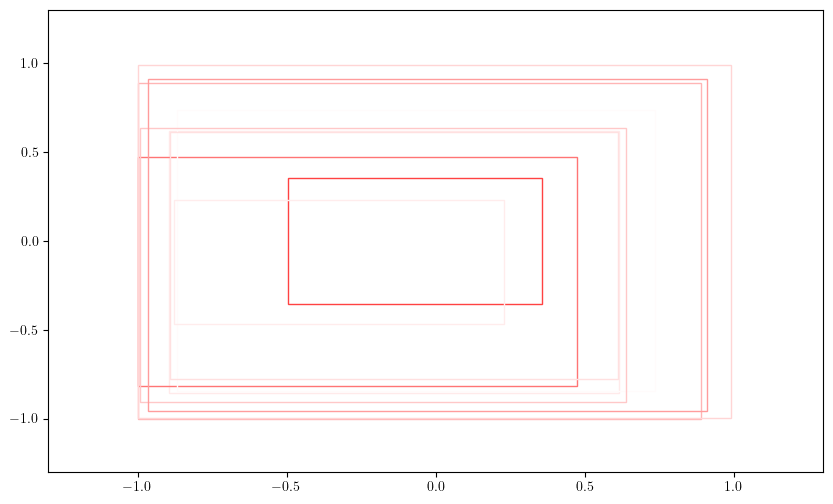

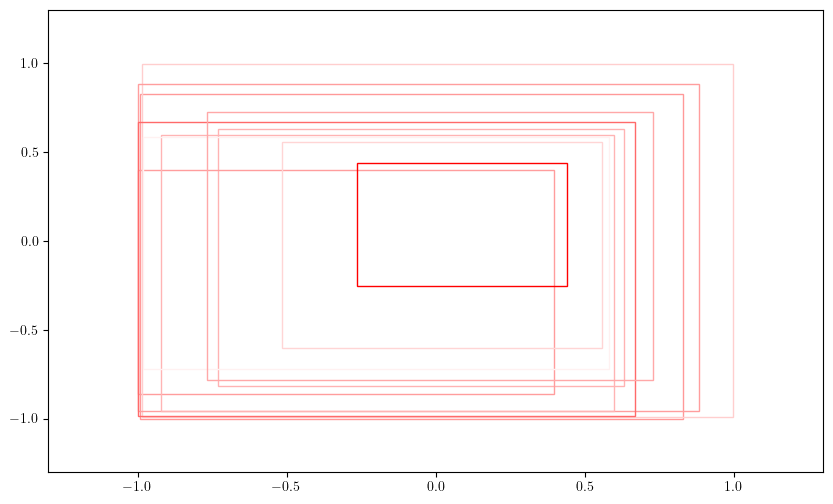

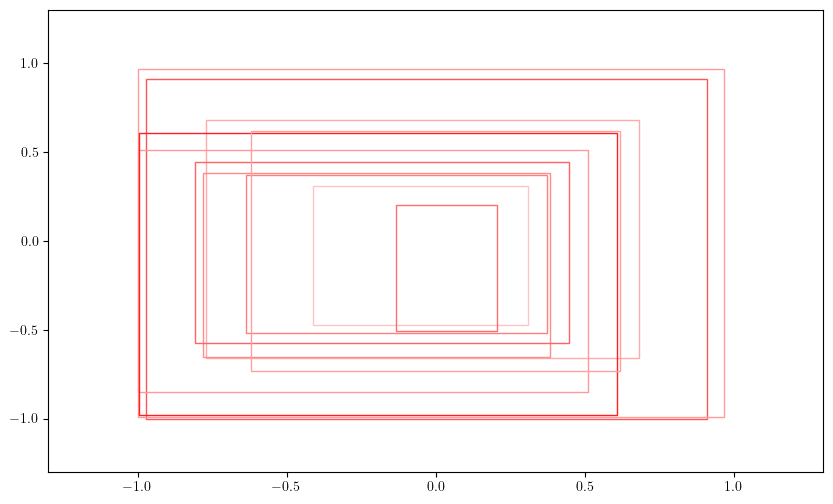

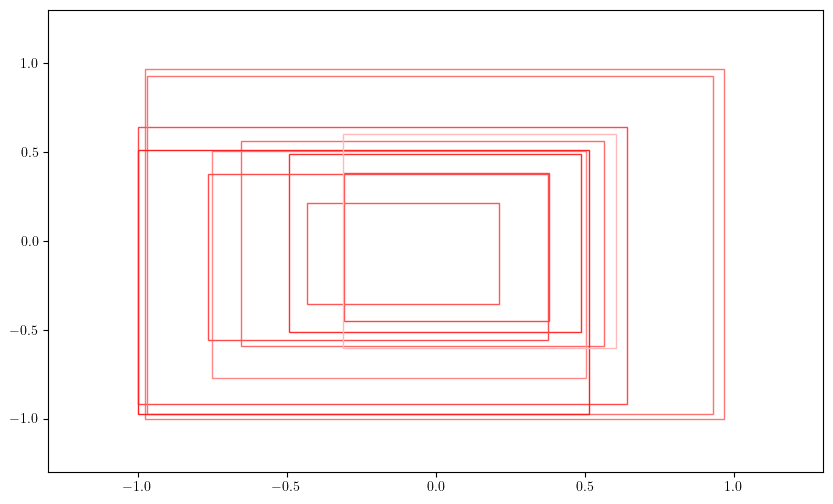

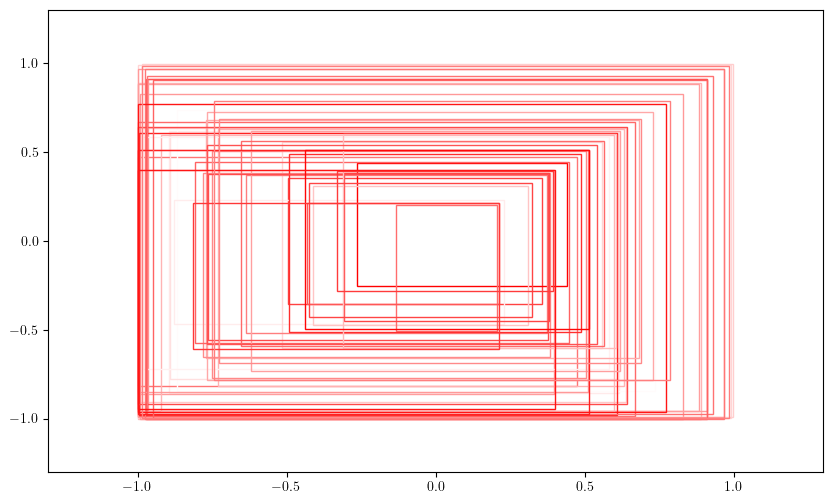

In [4]:
# Move to correct location
os.chdir('/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaceDataAnalysis')

#Recieve pkl training files
trainingFiles1 = dataExtractor.extractSpecificParticipantFiles(trialType= "_training1",usePkl=True)
trainingFiles2 = dataExtractor.extractSpecificParticipantFiles(trialType= "_training2",usePkl=True)
trainingFiles3 = dataExtractor.extractSpecificParticipantFiles(trialType= "_training3",usePkl=True)
trainingFiles4 = dataExtractor.extractSpecificParticipantFiles(trialType= "_training4",usePkl=True)
trainingFiles5 = dataExtractor.extractSpecificParticipantFiles(trialType= "_test",usePkl=True)
trainingFiles = trainingFiles1 + trainingFiles2 + trainingFiles3 + trainingFiles4 + trainingFiles5
print(len(trainingFiles))
# Retrieve calibration values
calibrationDict = {
    'Participant': [],
    'Trial': [],
    'xInputMin': [],
    'xInputMax': [],
    'yInputMin': [],
    'yInputMax': [],
    'xRangeMetric': [],
    'yRangeMetric': []

}

# Store data]


for idx, file in enumerate(trainingFiles):

    # Open file
    with open(file, 'rb') as file:
        gameEngine,player = pickle.load(file)

        # Populate dict
        calibrationDict['Participant'].append(idx)
        calibrationDict['Trial'].append(idx//11)
        calibrationDict['xInputMin'].append(float(player.userMinXValue))
        calibrationDict['xInputMax'].append(float(player.userMaxXValue))
        calibrationDict['yInputMin'].append(float(player.userMinYValue))
        calibrationDict['yInputMax'].append(float(player.userMaxYValue))
        calibrationDict['xRangeMetric'].append(float(np.abs(player.xRange)/2))
        calibrationDict['yRangeMetric'].append(float(np.abs(player.yRange)/2))
print(len(calibrationDict['xInputMax']))

#Plot data
fig = plt.figure(figsize = (10,6))
ax = plt.gca()

for i in range(0,11):
    colorVal = 1 - 1 * ((scores[i%11,i // 11] - minScore) / (maxScore - minScore))
    color = (1,colorVal,colorVal)
    rectangle = patches.Rectangle((calibrationDict['xInputMin'][i], calibrationDict['yInputMin'][i]), calibrationDict['xInputMax'][i] - calibrationDict['xInputMin'][i], calibrationDict['xInputMax'][i] - calibrationDict['yInputMin'][i], linewidth=1, edgecolor=color, facecolor='none')

    # Add the rectangle to the Axes
    ax.add_patch(rectangle) 
delta = 0.3
plt.xlim(-1-delta,1+delta)
plt.ylim(-1-delta,1+ delta)
plt.show()
        
#Plot data
fig = plt.figure(figsize = (10,6))
ax = plt.gca()

for i in range(11,22):
    colorVal = 1 - 1 * ((scores[i%11,i // 11] - minScore) / (maxScore - minScore))
    color = (1,colorVal,colorVal)
    rectangle = patches.Rectangle((calibrationDict['xInputMin'][i], calibrationDict['yInputMin'][i]), calibrationDict['xInputMax'][i] - calibrationDict['xInputMin'][i], calibrationDict['xInputMax'][i] - calibrationDict['yInputMin'][i], linewidth=1, edgecolor=color, facecolor='none')

    # Add the rectangle to the Axes
    ax.add_patch(rectangle) 
delta = 0.3
plt.xlim(-1-delta,1+delta)
plt.ylim(-1-delta,1+ delta)
plt.show()


#Plot data
fig = plt.figure(figsize = (10,6))
ax = plt.gca()

for i in range(22,33):
    colorVal = 1 - 1 * ((scores[i%11,i // 11] - minScore) / (maxScore - minScore))
    color = (1,colorVal,colorVal)
    rectangle = patches.Rectangle((calibrationDict['xInputMin'][i], calibrationDict['yInputMin'][i]), calibrationDict['xInputMax'][i] - calibrationDict['xInputMin'][i], calibrationDict['xInputMax'][i] - calibrationDict['yInputMin'][i], linewidth=1, edgecolor=color, facecolor='none')

    # Add the rectangle to the Axes
    ax.add_patch(rectangle) 
delta = 0.3
plt.xlim(-1-delta,1+delta)
plt.ylim(-1-delta,1+ delta)
plt.show()
        
#Plot data
fig = plt.figure(figsize = (10,6))
ax = plt.gca()

for i in range(33,44):
    colorVal = 1 - 1 * ((scores[i%11,i // 11] - minScore) / (maxScore - minScore))
    color = (1,colorVal,colorVal)
    rectangle = patches.Rectangle((calibrationDict['xInputMin'][i], calibrationDict['yInputMin'][i]), calibrationDict['xInputMax'][i] - calibrationDict['xInputMin'][i], calibrationDict['xInputMax'][i] - calibrationDict['yInputMin'][i], linewidth=1, edgecolor=color, facecolor='none')

    # Add the rectangle to the Axes
    ax.add_patch(rectangle) 
delta = 0.3
plt.xlim(-1-delta,1+delta)
plt.ylim(-1-delta,1+ delta)
plt.show()

#Plot data
fig = plt.figure(figsize = (10,6))
ax = plt.gca()
        
for i in range(0,55):
    colorVal = 1 - 1 * ((scores[i%11,i // 11] - minScore) / (maxScore - minScore))
    color = (1,colorVal,colorVal)
    rectangle = patches.Rectangle((calibrationDict['xInputMin'][i], calibrationDict['yInputMin'][i]), calibrationDict['xInputMax'][i] - calibrationDict['xInputMin'][i], calibrationDict['xInputMax'][i] - calibrationDict['yInputMin'][i], linewidth=1, edgecolor=color, facecolor='none')

    # Add the rectangle to the Axes
    ax.add_patch(rectangle) 
delta = 0.3
plt.xlim(-1-delta,1+delta)
plt.ylim(-1-delta,1+ delta)
plt.show()

#look at how much it differs from a square

[0.9866497071920404, 0.8036405004765736, 0.9061923699621335, 0.9597479661227085, 0.6423457140230253, 0.8023579025981951, 0.8119595003521658, 0.38647993271116377, 0.4555637132558268, 0.9057613567375702, 0.9089614063061928, 0.993933058350227, 0.726282145004132, 0.9293729015007718, 0.9736053178415689, 0.5350612239291173, 0.9237602812819667, 0.9615158169404658, 0.3556285195938613, 0.6434438834533537, 0.9586450697571646, 0.7358260658595371, 0.9949438088897233, 0.6622719513988511, 0.9197532308502547, 0.9475012812207593, 0.4368234340195108, 0.4824766258231893, 0.6395535378251859, 0.32653889317799567, 0.4916050879251083, 0.9470469446444622, 0.6806227940782397, 0.9947648977826957, 0.5834643992954861, 0.8962644365045915, 0.921963521047165, 0.38571220972947107, 0.44129210045769574, 0.7157745677765862, 0.25914147280672917, 0.5183607602554423, 0.9414455855185511, 0.5344973622053285, 0.9936042897251995, 0.6230368457043651, 0.9469491205974028, 0.9772754112589326, 0.37973157507159194, 0.42374805812610

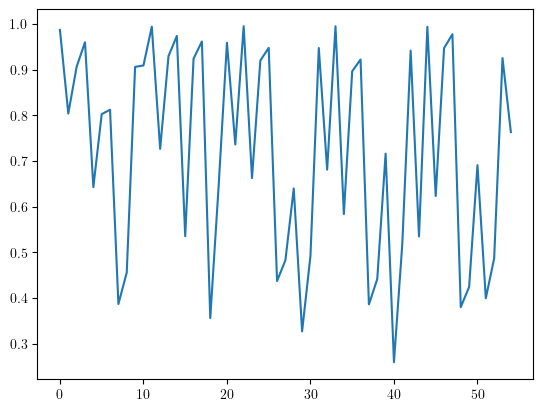

(5, 11)
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  ]
PearsonRResult(statistic=-0.24682695809085628, pvalue=0.06926388488754592)


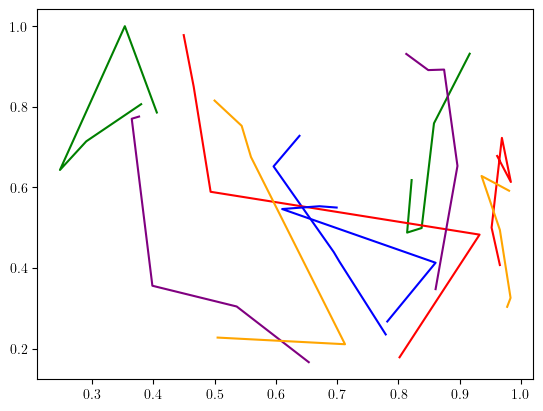

In [5]:
# Let's plot the avg calibration window by score
print(calibrationDict['yRangeMetric'])
plt.plot(calibrationDict['yRangeMetric'])
yRanges = np.asarray(calibrationDict['yRangeMetric'])
xRanges = np.asarray(calibrationDict['xRangeMetric'])
trials = np.asarray(calibrationDict['Trial']) / 4
bothRanges = np.concatenate([xRanges,yRanges]).reshape(2,-1)
avgRanges = np.average(bothRanges,axis = 0)
plt.show()
print(scores.T.shape)
scores_ = scores.T.reshape(-1)/np.max(scores)
plt.plot(avgRanges[[0,11,22,33,44]],scores_[[0,11,22,33,44]], color = 'red')
plt.plot(avgRanges[[1,12,23,34,45]],scores_[[1,12,23,34,45]], color = 'blue')
plt.plot(avgRanges[[2,13,24,35,46]],scores_[[2,13,24,35,46]], color = 'green')
plt.plot(avgRanges[[3,14,25,36,47]],scores_[[3,14,25,36,47]], color = 'orange')
plt.plot(avgRanges[[4,15,26,37,48]],scores_[[4,15,26,37,48]], color = 'purple')
plt.plot(avgRanges[[5,16,27,38,49]],scores_[[5,16,27,38,49]], color = 'red')
plt.plot(avgRanges[[6,17,28,39,50]],scores_[[6,17,28,39,50]], color = 'blue')
plt.plot(avgRanges[[7,18,29,40,51]],scores_[[7,18,29,40,51]], color = 'green')
plt.plot(avgRanges[[8,19,30,41,52]],scores_[[8,19,30,41,52]], color = 'orange')
plt.plot(avgRanges[[9,20,31,42,53]],scores_[[9,20,31,42,53]], color = 'purple')
#print(yRanges)
import scipy.stats as stats
print(trials)
print(stats.pearsonr(avgRanges,scores_))

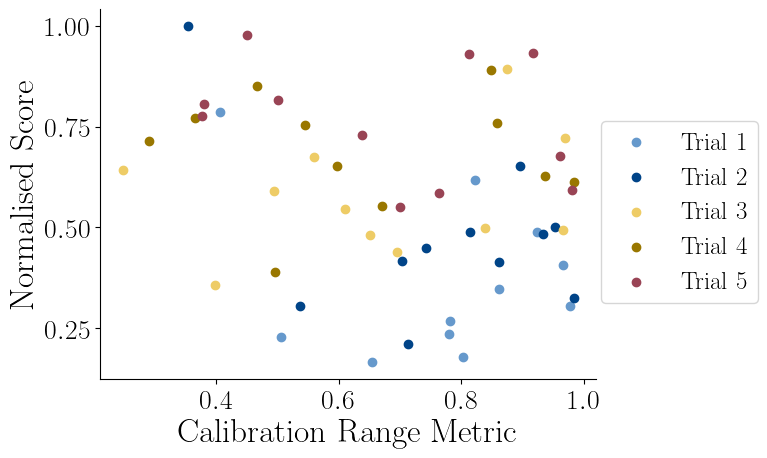

In [6]:
cmap = tol_cset('medium-contrast')
colors = [cmap[0]] * 11 + [cmap[1]] * 11 + [cmap[2]] * 11 + [cmap[4]] * 11 + [cmap[3]] * 11

# Plot each category
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    plt.scatter(avgRanges[start_index:end_index], scores_[start_index:end_index], color=colors[start_index], label=f'Trial {i+1}')

# Add legend
plt.legend()

# Display the plot


ax = plt.gca()

pf.defaultPlottingConfiguration(ax,maxXTicks= 4, maxYTicks = 4,xlabel = "Calibration Range Metric",ylabel =  'Normalised Score')
plt.legend(loc = 'upper right', fontsize = 18,bbox_to_anchor=(1.35, 0.73))




PearsonRResult(statistic=-0.07458415064412902, pvalue=0.5883829664595209)


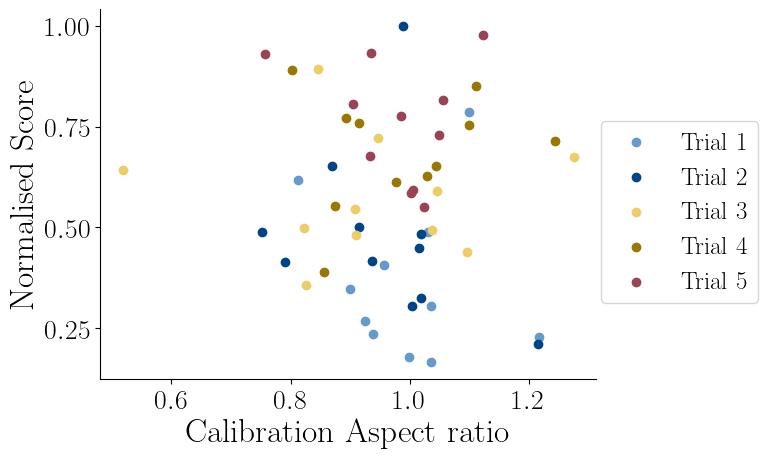

In [7]:
# Define something called squareicity - representing how square like the range is

aspectRatio = [np.abs(w)/np.abs(h) for w,h in zip(xRanges,yRanges) ]

cmap = tol_cset('medium-contrast')
colors = [cmap[0]] * 11 + [cmap[1]] * 11 + [cmap[2]] * 11 + [cmap[4]] * 11 + [cmap[3]] * 11

# Plot each category
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    plt.scatter(aspectRatio[start_index:end_index], scores_[start_index:end_index], color=colors[start_index], label=f'Trial {i+1}')

# Add legend
plt.legend()

# Display the plot


ax = plt.gca()

pf.defaultPlottingConfiguration(ax,maxXTicks= 4, maxYTicks = 4,xlabel = "Calibration Aspect ratio",ylabel =  'Normalised Score')
plt.legend(loc = 'upper right', fontsize = 18,bbox_to_anchor=(1.35, 0.73))

print(stats.pearsonr(aspectRatio,scores_))

-0.2312409812409813 0.08938572495312988


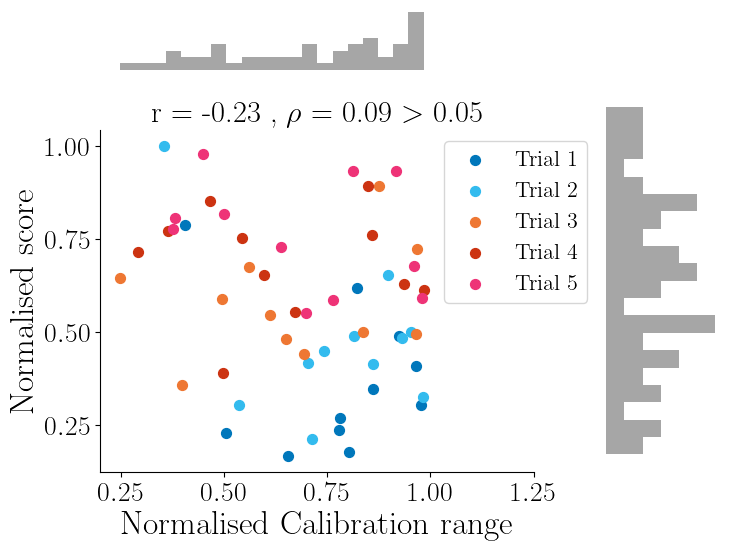

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sample data
np.random.seed(0)

# Create a figure with a gridspec
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(4, 5, fig,height_ratios=[0.15,0.05,0.65,0.15],width_ratios=[0.2,0.3,0.15,0.05,0.19])

# Scatter plot
ax_main = fig.add_subplot(gs[2:4, 0:3])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(avgRanges[start_index:end_index],scores_[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )



ax_main.legend()
ax_main.set_xlim(0.2,1.25)
R,p = stats.spearmanr(avgRanges,scores_)

pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=4, ylabel = "Normalised score",xlabel = "Normalised Calibration range",)
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.15, 1))
print(R,p)
plt.title(r"r = {} , $\rho$ = {} $>$ 0.05 ".format(round(R,2),round(p,2)), fontsize = 22)


# Histogram for x-axis
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_xhist.hist(avgRanges, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')

# Histogram for y-axis
ax_yhist = fig.add_subplot(gs[1:4, 4], sharey=ax_main)
ax_yhist.hist(scores_, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')





# Adjust layout
#plt.tight_layout()

plt.show()

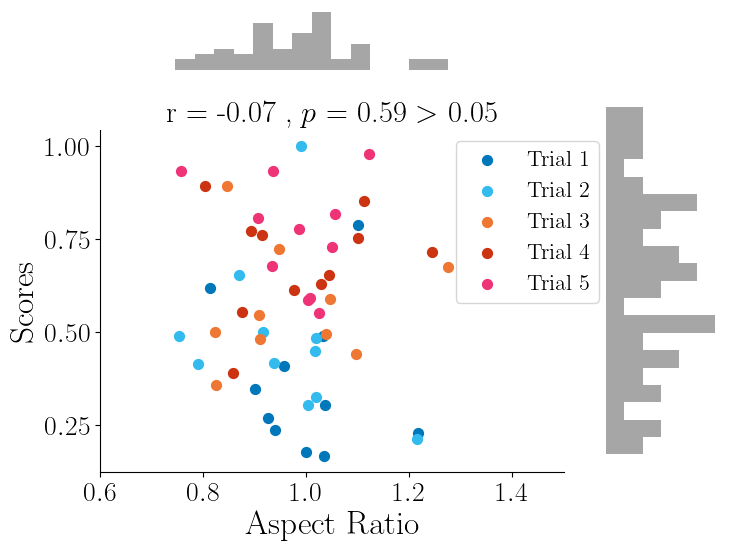

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Sample data
np.random.seed(0)

# Create a figure with a gridspec
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(4, 5, fig,height_ratios=[0.15,0.05,0.65,0.15],width_ratios=[0.2,0.3,0.20,0.,0.19])

# Scatter plot
ax_main = fig.add_subplot(gs[2:4, 0:3])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(aspectRatio[start_index:end_index],scores_[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )



ax_main.legend()
ax_main.set_xlim(0.6,1.5)

R,p = stats.pearsonr(aspectRatio,scores_)

pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=4, xlabel = "Aspect Ratio",ylabel = "Scores")
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.1, 1))


plt.title(r"r = {} , $p$ $=$ {} $>$ 0.05 ".format(round(R,2),round(p,2)), fontsize = 22)


# Histogram for x-axis
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_xhist.hist(aspectRatio, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')

# Histogram for y-axis
ax_yhist = fig.add_subplot(gs[1:4, 4], sharey=ax_main)
ax_yhist.hist(scores_, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')





# Adjust layout
#plt.tight_layout()

plt.show()

-0.2312409812409813 0.08938572495312988


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/650249622.py:94: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationAnalysis.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/650249622.py:94: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationAnalysis.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/650249622.py:94: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationAnalysis.pdf",bbox_inches='tight')


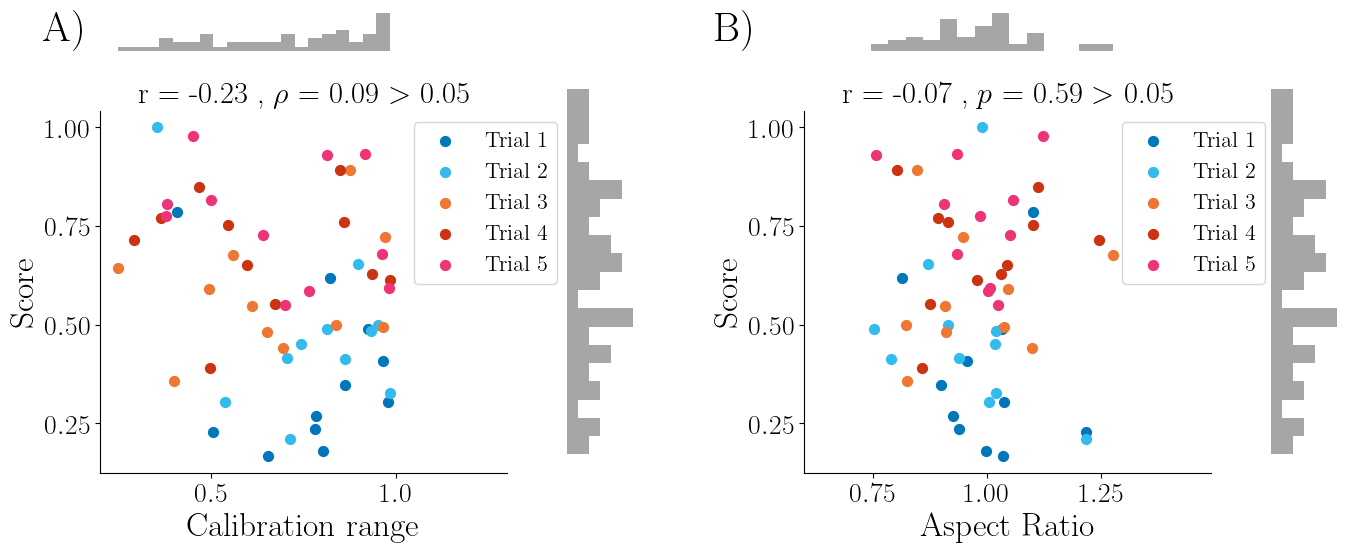

In [10]:
# Create a figure
fig = plt.figure(figsize=(16, 6))

from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# Create the outer GridSpec
outer_gs = GridSpec(1, 3, figure=fig, width_ratios=[0.49,0.02, 0.49], height_ratios=[1])

nested_gs1 = GridSpecFromSubplotSpec(4, 5, subplot_spec=outer_gs[0, 0],height_ratios=[0.1,0.05,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.05,0.15])


# Scatter plot
ax_main = fig.add_subplot(nested_gs1[2:4, 0:3])
ax_main.text(0.1, 1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")

cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(avgRanges[start_index:end_index],scores_[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )



ax_main.legend()
ax_main.set_xlim(0.2,1.3)
R,p = stats.spearmanr(avgRanges,scores_)

pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=4, ylabel = "Score",xlabel = "Calibration range",)
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.15, 1))
print(R,p)
plt.title(r"r = {} , $\rho$ = {} $>$ 0.05 ".format(round(R,2),round(p,2)), fontsize = 22)


# Histogram for x-axis
ax_xhist = fig.add_subplot(nested_gs1[0, 0:3], sharex=ax_main)
ax_xhist.hist(avgRanges, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')

# Histogram for y-axis
ax_yhist = fig.add_subplot(nested_gs1[1:4, 4], sharey=ax_main)
ax_yhist.hist(scores_, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')





gs = GridSpecFromSubplotSpec(4, 5, subplot_spec=outer_gs[0, 2],height_ratios=[0.1,0.05,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.05,0.15])

# Scatter plot
ax_main = fig.add_subplot(gs[2:4, 0:3])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(aspectRatio[start_index:end_index],scores_[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )



ax_main.legend()
ax_main.set_xlim(0.6,1.49)

R,p = stats.pearsonr(aspectRatio,scores_)

pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=4, xlabel = "Aspect Ratio",ylabel = "Score")
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.16, 1))


plt.title(r"r = {} , $p$ $=$ {} $>$ 0.05 ".format(round(R,2),round(p,2)), fontsize = 22)

ax_main.text(0.45, 1.3, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")




# Histogram for x-axis
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_xhist.hist(aspectRatio, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')

# Histogram for y-axis
ax_yhist = fig.add_subplot(gs[1:4, 4], sharey=ax_main)
ax_yhist.hist(scores_, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')



plt.savefig("1.2-CalibrationAnalysis.pdf",bbox_inches='tight')

plt.show()


In [11]:
# Calculate variability values of training data
rmsValues = variabilityAnalysis.calculateVariabilityScores(rigidBodyTrain1,includePositions=False,positionsOnly=False)
print(rmsValues.shape)

# Calculate variability values of individual body parts by summing over dof for each body part
rmsValues = np.sum(rmsValues.reshape(19,3,noParticipants*5),axis = 1).reshape(19,noParticipants*5)

# Normalisation and sum variability values across DOF
summedRMSvaluesAcrossDOF = np.sum(rmsValues.reshape(19,5,noParticipants),axis = 0)
summedRMSvaluesAcrossDOF = summedRMSvaluesAcrossDOF / np.max(summedRMSvaluesAcrossDOF)

summedRMSvaluesAcrossDOF.shape # trials participants
scores = scores/np.max(scores)

variabilities = summedRMSvaluesAcrossDOF.reshape(-1)

(57, 55)


0.585786435786436 2.623753347280842e-06


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/2000408889.py:94: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationAnalysis-variability.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/2000408889.py:94: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationAnalysis-variability.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/2000408889.py:94: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationAnalysis-variability.pdf",bbox_inches='tight')

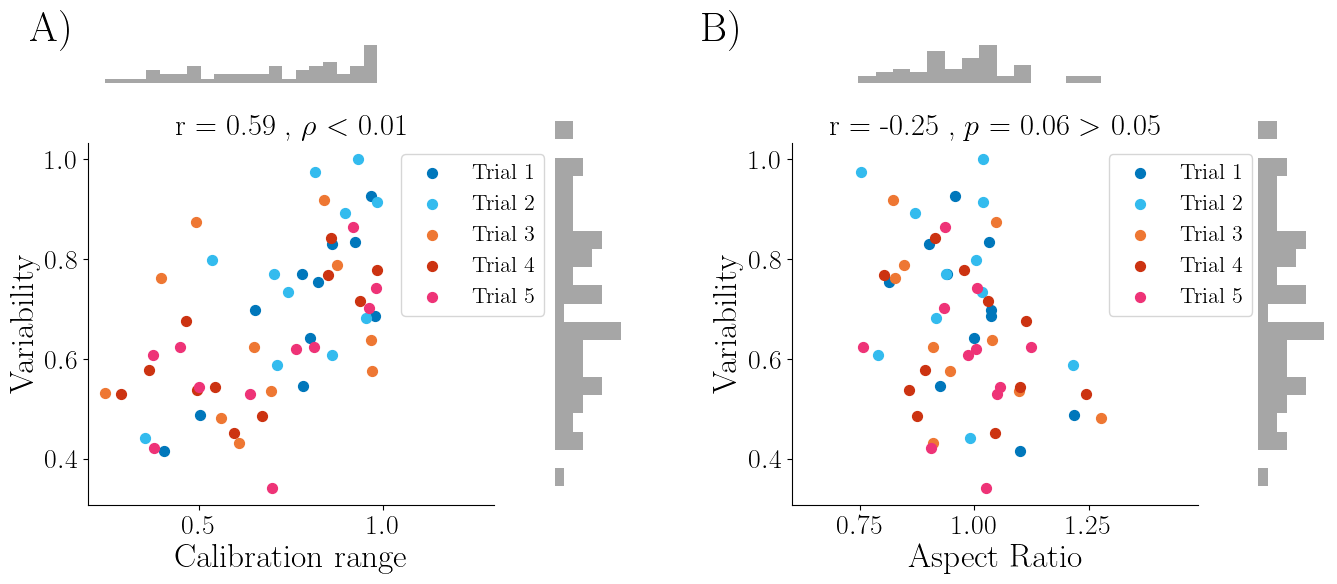

In [12]:
# Create a figure
fig = plt.figure(figsize=(16, 6))

from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# Create the outer GridSpec
outer_gs = GridSpec(1, 3, figure=fig, width_ratios=[0.49,0.02, 0.49], height_ratios=[1])

nested_gs1 = GridSpecFromSubplotSpec(4, 5, subplot_spec=outer_gs[0, 0],height_ratios=[0.1,0.05,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.05,0.15])


# Scatter plot
ax_main = fig.add_subplot(nested_gs1[2:4, 0:3])
ax_main.text(0.1, 1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")

cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(avgRanges[start_index:end_index],variabilities[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )



ax_main.legend()
ax_main.set_xlim(0.2,1.3)
R,p = stats.spearmanr(avgRanges,variabilities)

pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=4, ylabel = "Variability",xlabel = "Calibration range",)
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.15, 1))
print(R,p)
plt.title(r"r = {} , $\rho$ $<$ 0.01 ".format(round(R,2)), fontsize = 22)


# Histogram for x-axis
ax_xhist = fig.add_subplot(nested_gs1[0, 0:3], sharex=ax_main)
ax_xhist.hist(avgRanges, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')

# Histogram for y-axis
ax_yhist = fig.add_subplot(nested_gs1[1:4, 4], sharey=ax_main)
ax_yhist.hist(variabilities, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')





gs = GridSpecFromSubplotSpec(4, 5, subplot_spec=outer_gs[0, 2],height_ratios=[0.1,0.05,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.05,0.15])

# Scatter plot
ax_main = fig.add_subplot(gs[2:4, 0:3])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(aspectRatio[start_index:end_index],variabilities[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )



ax_main.legend()
ax_main.set_xlim(0.6,1.49)

R,p = stats.pearsonr(aspectRatio,variabilities)

pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=4, xlabel = "Aspect Ratio",ylabel = "Variability")
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.16, 1))


plt.title(r"r = {} , $p$ $=$ {} $>$ 0.05 ".format(round(R,2),round(p,2)), fontsize = 22)

ax_main.text(0.45, 1.3, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")




# Histogram for x-axis
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_xhist.hist(aspectRatio, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')

# Histogram for y-axis
ax_yhist = fig.add_subplot(gs[1:4, 4], sharey=ax_main)
ax_yhist.hist(variabilities, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')



plt.savefig("1.2-CalibrationAnalysis-variability.pdf",bbox_inches='tight')

plt.show()


-0.2312409812409813 0.08938572495312988
0.585786435786436 2.623753347280842e-06


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/2748876724.py:84: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationRangeRatioAnalysis.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/2748876724.py:84: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationRangeRatioAnalysis.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/2748876724.py:84: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationRangeRatioAnalysis.pdf",bbox_inches='tight')


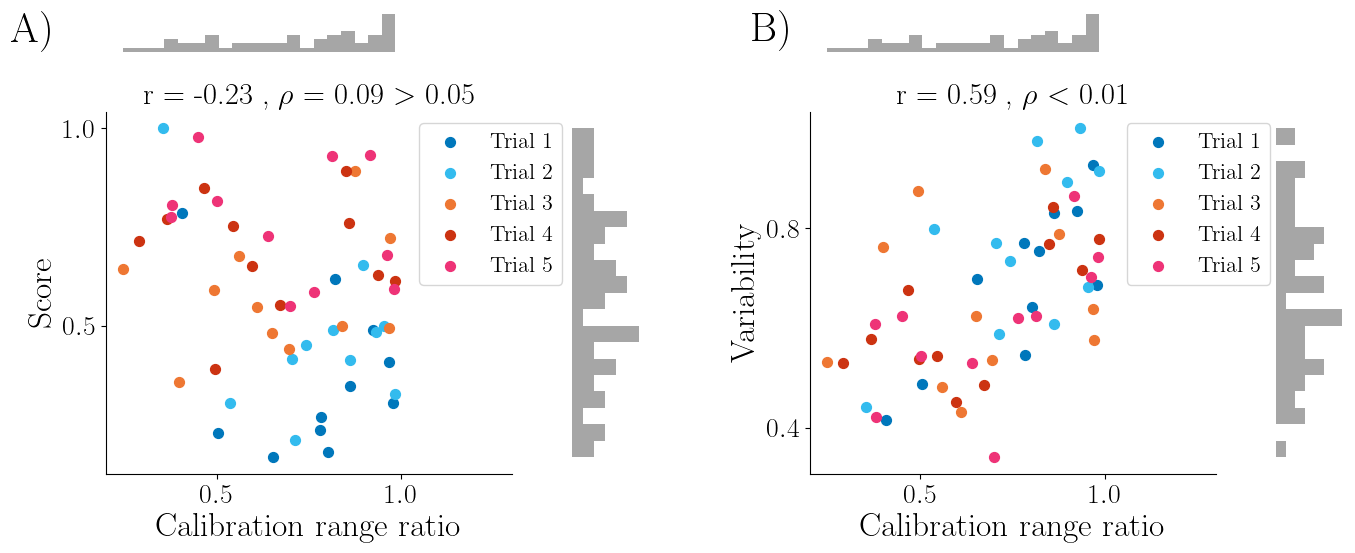

In [25]:
# Create a figure
fig = plt.figure(figsize=(16, 6))

from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# Create the outer GridSpec
outer_gs = GridSpec(1, 3, figure=fig, width_ratios=[0.49,0.02, 0.49], height_ratios=[1])

nested_gs1 = GridSpecFromSubplotSpec(4, 5, subplot_spec=outer_gs[0, 0],height_ratios=[0.1,0.05,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.05,0.15])


# Scatter plot
ax_main = fig.add_subplot(nested_gs1[2:4, 0:3])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(avgRanges[start_index:end_index],scores_[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )



ax_main.legend()
ax_main.set_xlim(0.2,1.3)
R,p = stats.spearmanr(avgRanges,scores_)

pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=2, ylabel = "Score",xlabel = "Calibration range ratio",)
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.15, 1))
print(R,p)
plt.title(r"r = {} , $\rho$ = {} $>$ 0.05 ".format(round(R,2),round(p,2)), fontsize = 22)


# Histogram for x-axis
ax_xhist = fig.add_subplot(nested_gs1[0, 0:3], sharex=ax_main)
ax_xhist.hist(avgRanges, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')
ax_main.text(0.0, 1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")
# Histogram for y-axis
ax_yhist = fig.add_subplot(nested_gs1[2:4, 4], sharey=ax_main)
ax_yhist.hist(scores_, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')


gs = GridSpecFromSubplotSpec(4, 5, subplot_spec=outer_gs[0, 2],height_ratios=[0.1,0.05,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.05,0.15])

# Scatter plot
ax_main = fig.add_subplot(gs[2:4, 0:3])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(avgRanges[start_index:end_index],variabilities[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )

ax_main.legend()
ax_main.set_xlim(0.2,1.3)

R,p = stats.spearmanr(avgRanges,variabilities)
print(R,p)
pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=2, xlabel = "Calibration range ratio",ylabel = "Variability")
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.16, 1))

plt.title(r"r = {} , $\rho$  $<$ 0.01 ".format(round(R,2),round(p,2)), fontsize = 22)

# Histogram for x-axis
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_xhist.hist(avgRanges, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')
ax_main.text(0.1, 1.238, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")

# Histogram for y-axis
ax_yhist = fig.add_subplot(gs[2:4, 4], sharey=ax_main)
ax_yhist.hist(variabilities, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')



plt.savefig("1.2-CalibrationRangeRatioAnalysis.pdf",bbox_inches='tight')

plt.show()


-0.07458415064412902 0.5883829664595209


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/970217382.py:84: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationAspectRatioAnalysis.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/970217382.py:84: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationAspectRatioAnalysis.pdf",bbox_inches='tight')
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_12629/970217382.py:84: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("1.2-CalibrationAspectRatioAnalysis.pdf",bbox_inches='tight')


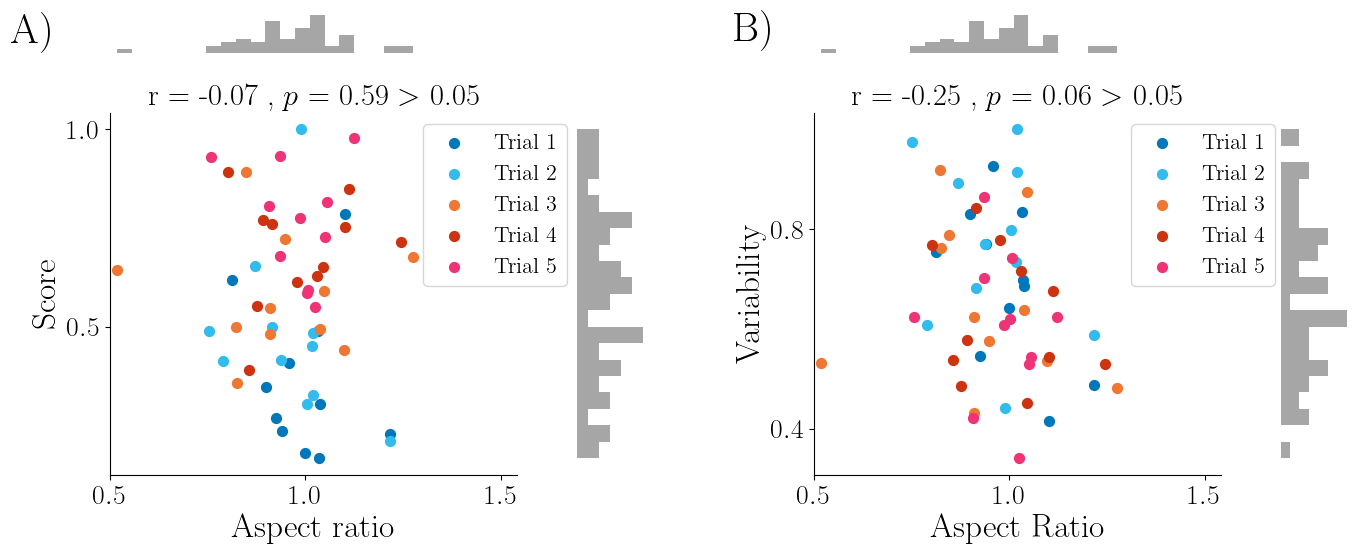

In [14]:
# Create a figure
fig = plt.figure(figsize=(16, 6))

from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

# Create the outer GridSpec
outer_gs = GridSpec(1, 3, figure=fig, width_ratios=[0.49,0.02, 0.49], height_ratios=[1])

nested_gs1 = GridSpecFromSubplotSpec(4, 5, subplot_spec=outer_gs[0, 0],height_ratios=[0.1,0.05,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.05,0.15])


# Scatter plot
ax_main = fig.add_subplot(nested_gs1[2:4, 0:3])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(aspectRatio[start_index:end_index],scores_[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )



ax_main.legend()
ax_main.set_xlim(0.5,1.54)
R,p = stats.pearsonr(aspectRatio,scores_)

pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=2, ylabel = "Score",xlabel = "Aspect ratio",)
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.15, 1))
print(R,p)
plt.title(r"r = {} , $p$ = {} $>$ 0.05 ".format(round(R,2),round(p,2)), fontsize = 22)


# Histogram for x-axis
ax_xhist = fig.add_subplot(nested_gs1[0, 0:3], sharex=ax_main)
ax_xhist.hist(aspectRatio, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')
ax_main.text(0.3, 1.3, 'A)', ha='center', va='top', fontsize=30, fontweight = "bold")
# Histogram for y-axis
ax_yhist = fig.add_subplot(nested_gs1[2:4, 4], sharey=ax_main)
ax_yhist.hist(scores_, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')


gs = GridSpecFromSubplotSpec(4, 5, subplot_spec=outer_gs[0, 2],height_ratios=[0.1,0.05,0.7,0.15],width_ratios=[0.2,0.3,0.3,0.05,0.15])

# Scatter plot
ax_main = fig.add_subplot(gs[2:4, 0:3])


cmap = tol_cset('vibrant')

colors = [cmap[1], cmap[2] , cmap[0] , cmap[4] , cmap[3]]
for i in range(5):
    start_index = i * 11
    end_index = start_index + 11
    ax_main.scatter(aspectRatio[start_index:end_index],variabilities[start_index:end_index].T,label ="Trial " + str(i+1), s = 50,color = colors[i] )

ax_main.legend()
ax_main.set_xlim(0.5,1.54)

R,p = stats.pearsonr(aspectRatio,variabilities)

pf.defaultPlottingConfiguration(ax_main,maxXTicks = 4, maxYTicks=2, xlabel = "Aspect Ratio",ylabel = "Variability")
plt.legend(loc = 'upper right', fontsize = 16,bbox_to_anchor=(1.16, 1))

plt.title(r"r = {} , $p$  $=$ {} $>$ 0.05".format(round(R,2),round(p,2)), fontsize = 22)

# Histogram for x-axis
ax_xhist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_xhist.hist(aspectRatio, bins=20, alpha=0.7, color='grey')
ax_xhist.axis('off')
ax_main.text(0.35, 1.24, 'B)', ha='center', va='top', fontsize=30, fontweight = "bold")

# Histogram for y-axis
ax_yhist = fig.add_subplot(gs[2:4, 4], sharey=ax_main)
ax_yhist.hist(variabilities, bins=20, orientation='horizontal', alpha=0.7, color='grey')
ax_yhist.axis('off')



plt.savefig("1.2-CalibrationAspectRatioAnalysis.pdf",bbox_inches='tight')

plt.show()


In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Sample data creation
data = {
    'Ranges': avgRanges,
    'Trials': trials,
    
}

X = np.asarray(pd.DataFrame(data))
y = scores_


In [16]:
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

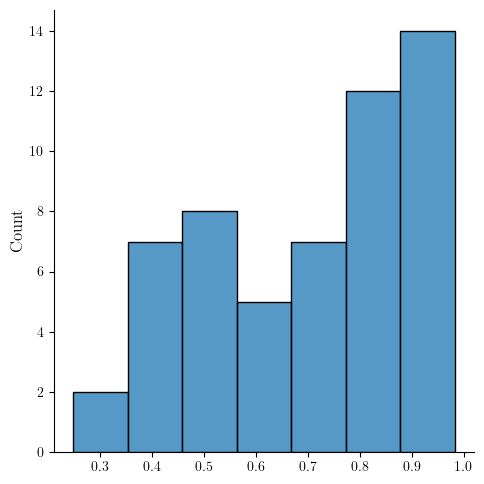

In [17]:
sns.displot(avgRanges)

In [18]:


X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [19]:
reg_model = LinearRegression().fit(X_train, y_train)

In [20]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(['Ranges', 'Trials'], reg_model.coef_))

#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

Intercept:  0.3655174139495112


In [21]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,0.546216,0.574262
1,0.892314,0.566228
2,0.479894,0.573052
3,0.500000,0.450218
4,0.714256,0.697632
5,0.591629,0.790311
6,0.407254,0.336154
7,0.267104,0.341739
8,0.355836,0.580699
9,0.584858,0.796893


In [22]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.16091612678042141
Mean Square Error: 0.041780304435390325
Root Mean Square Error: 0.2044023102496406


In [23]:
# Redo only using the range

X_train,X_test, y_train, y_test = train_test_split(X[:,0].reshape(-1,1), y, test_size = 0.3, random_state = 100)
reg_model = LinearRegression().fit(X_train, y_train)
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(['Ranges', 'Trials'], reg_model.coef_))

#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
print(reg_model_diff)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Intercept:  0.7152822730164775
    Actual value  Predicted value
0       0.546216         0.588823
1       0.892314         0.534090
2       0.479894         0.580583
3       0.500000         0.518039
4       0.714256         0.655016
5       0.591629         0.512129
6       0.407254         0.515244
7       0.267104         0.553290
8       0.355836         0.632674
9       0.584858         0.556964
10      0.178302         0.549144
11      0.653170         0.529572
12      0.549881         0.570402
13      1.000000         0.641983
14      0.850042         0.618717
15      0.613306         0.511528
16      0.770281         0.639653
Mean Absolute Error: 0.15846556459867522
Mean Square Error: 0.04022032493371675
Root Mean Square Error: 0.20055005593047526


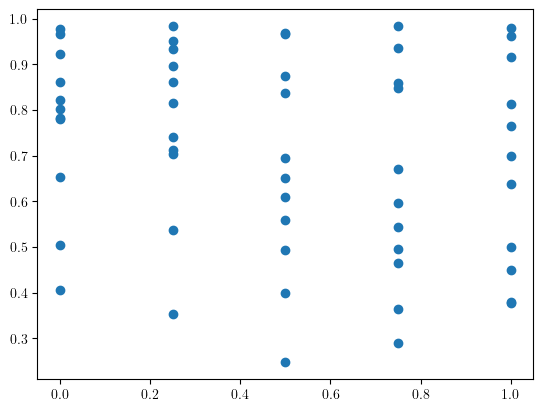

In [24]:
plt.scatter(X[:,1],X[:,0])